In [2]:
import numpy as np 
import pandas as pd 
import missingno as msno 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from numpy import median
from numpy import std

from scipy import stats
import os



# Loading data

In [3]:
data = pd.read_csv(r"C:\Users\afiroz\Downloads\ifood_df.csv")
data.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
data.shape

(2205, 39)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [6]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


# Null Values

In [7]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [8]:
data.drop_duplicates(keep=False, inplace=True)

In [9]:
#First, Change Column data type to string and then replace 1 with different number & 0 with blank.
data['marital_Married']=data['marital_Married'].astype(str).replace({'1':'5','0':''})
data['marital_Single']=data['marital_Single'].astype(str).replace({'1':'4','0':''})
data['marital_Together']=data['marital_Together'].astype(str).replace({'1':'3','0':''})
data['marital_Widow']=data['marital_Widow'].astype(str).replace({'1':'2','0':''})
data['marital_Divorced']=data['marital_Divorced'].astype(str).replace({'0':''})
#Now all columns contain different numbers for different marital status, lets join them in one column.
data['marital_status']=data["marital_Widow"]+data['marital_Together']+data['marital_Single']+data['marital_Married']+data['marital_Divorced']
#Next, we map numbers into different categorical values.
data['marital_status']=data['marital_status'].map({'1':'Divorced', '2':'Widow','3':'Together','4':'Single','5':'Married'})


data['education_2n Cycle']=data['education_2n Cycle'].astype(str).replace({'0':''})
data['education_Basic']=data['education_Basic'].astype(str).replace({'1':'2','0':''})
data['education_Graduation']=data['education_Graduation'].astype(str).replace({'1':'3','0':''})
data['education_Master']=data['education_Master'].astype(str).replace({'1':'4','0':''})
data['education_PhD']=data['education_PhD'].astype(str).replace({'1':'5','0':''})
data['education_level']=data['education_2n Cycle']+data['education_Basic']+data['education_Graduation']+data['education_Master']+data['education_PhD']
data['education_level']=data['education_level'].map({'1':'2n Cycle','2':'Basic','3':'Graduation','4':'Master','5':'PhD'})
data['kids']=data['Kidhome']+data['Teenhome']

# Exploratory data Analysis

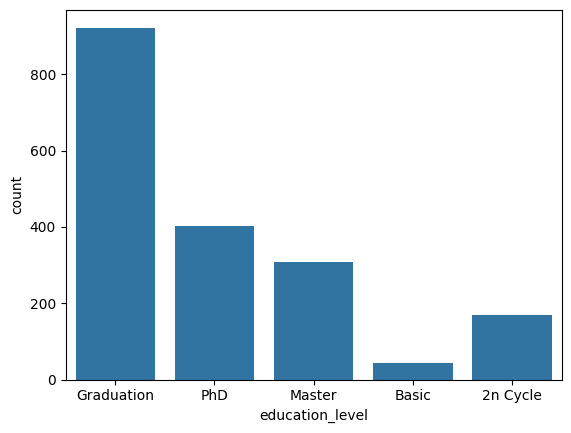

In [12]:
sns.countplot(x="education_level", data=data)
plt.show()

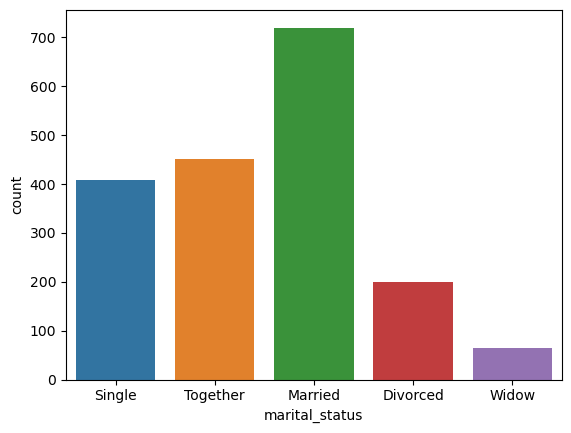

In [12]:
sns.countplot(x="marital_status", data=data)
plt.show()

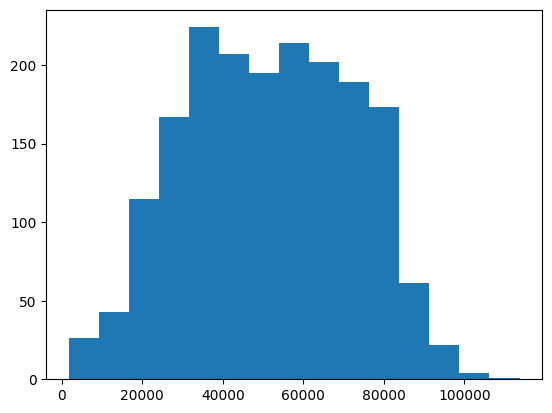

In [13]:
plt.hist(data["Income"], bins=15)
plt.show()

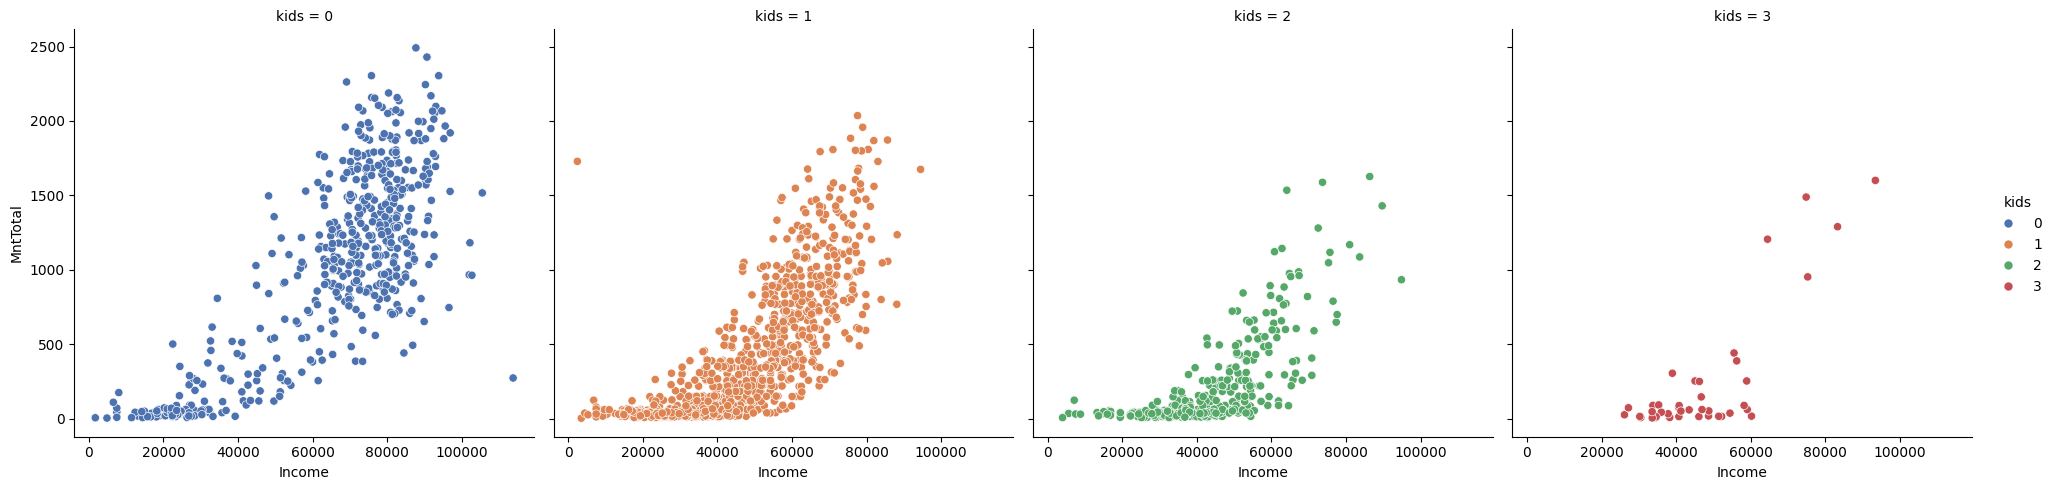

In [14]:
sns.relplot(x="Income", y="MntTotal", data=data, col="kids",hue="kids", kind="scatter",palette="deep")
plt.show()

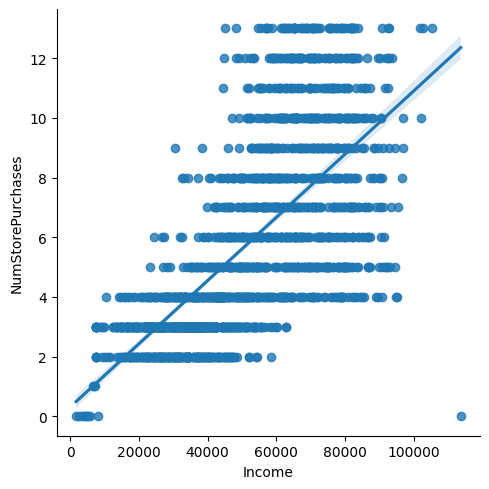

In [16]:
sns.lmplot(data=data, x="Income", y="NumStorePurchases")
plt.show()

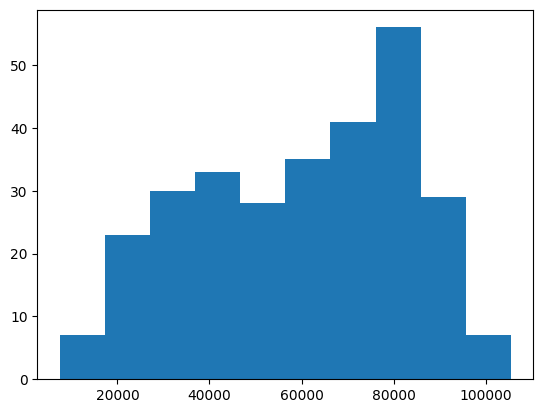

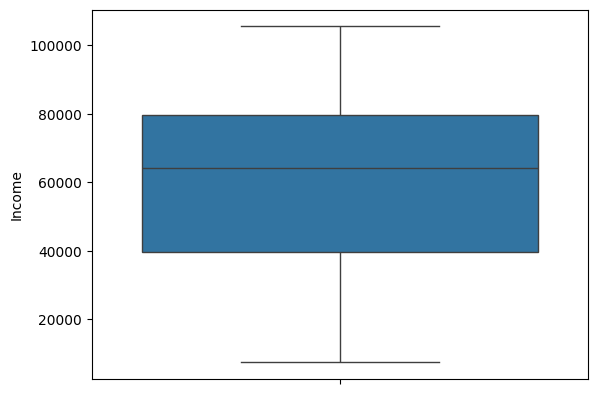

In [17]:
plt.hist(data[data["Response"]==1]["Income"])
plt.show()

sns.boxplot(y=data[data["Response"]==1]["Income"])
plt.show()

In [18]:
df=pd.read_csv(r"C:\Users\afiroz\Downloads\ifood_df.csv")
df.shape

(2205, 39)

# Modelling

In [19]:
cols = ['AcceptedCmp1',
       'AcceptedCmp2',
       'AcceptedCmp3',
       'AcceptedCmp4',
       'AcceptedCmp5',
       'AcceptedCmp']

## Create the target variable, if they accepted any campaign at all
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']+ df['Response']

df['AcceptedCmp'] = np.where(df['AcceptedCmp'] > 0, 1, 0)

In [20]:
from sklearn.model_selection import train_test_split

y = df['AcceptedCmp']
X = df.drop(cols,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

rf = LogisticRegression()

rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)

print(y_preds)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 

In [22]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)



In [23]:
print("Accuracy: {0}".format(accuracy))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

Accuracy: 0.7870879120879121
Precision: 0.6293103448275862
Recall: 0.3945945945945946


# F1 Score

In [24]:
f1 = f1_score(y_test, y_preds)
print("F1: {0}".format(f1))



F1: 0.4850498338870432


# ROC-AUC Score

In [25]:
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score
)
roc_auc = roc_auc_score(y_test, y_preds)

print("ROC-AUC: {0}".format(roc_auc))

ROC-AUC: 0.6577024538350505


# Log Loss

In [26]:
from sklearn.metrics import (
    log_loss
)

log_loss = log_loss(y_test, y_preds)

print("Log Loss: {0}".format(log_loss))

Log Loss: 7.674129499056535
